In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
img = cv2.imread(r'C:\Users\User\Desktop\Python_projects\Image_processing_project\image_2.jpeg')
cv2.imshow('Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

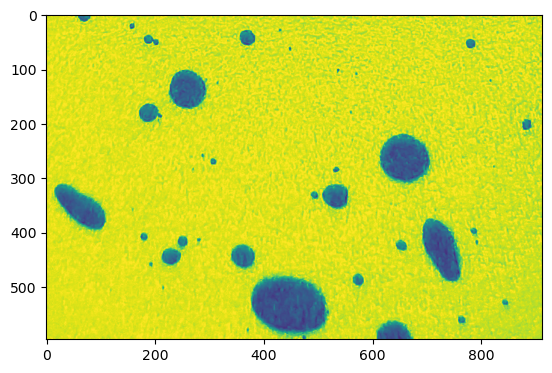

In [3]:
# same thing as above, but using plt so the image stays in the notebook
example_img = img[:, :, -1]
plt.imshow(example_img)

In [4]:
# splitting channels
b, g, r = cv2.split(img)

zeros = np.zeros_like(r)

# show only red channel as grayscale 
red_channel = cv2.merge([zeros, zeros, r])
cv2.imshow("Red Channel", red_channel)

green_channel = cv2.merge([zeros, g, zeros])
cv2.imshow("Green Channel", green_channel)

blue_channel = cv2.merge([b, zeros, zeros])
cv2.imshow("Blue Channel", blue_channel)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
# converting red_channel into grayscale
g_img = cv2.cvtColor(red_channel, cv2.COLOR_BGR2GRAY)
cv2.imshow('Grayscale Red Channel', g_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
# turning the grayscale image of the red channel into a binary image

threshold_value = 60  # You can adjust this value as needed

_, binary_mask = cv2.threshold(g_img, threshold_value, 255, cv2.THRESH_BINARY)

# Invert the binary mask to highlight dark gray values
inverted_mask = cv2.bitwise_not(binary_mask)

# Display the binary mask and inverted mask
cv2.imshow("Binary Mask", binary_mask)
cv2.imshow("Inverted Mask", inverted_mask)
cv2.waitKey(0)
cv2.destroyAllWindows()

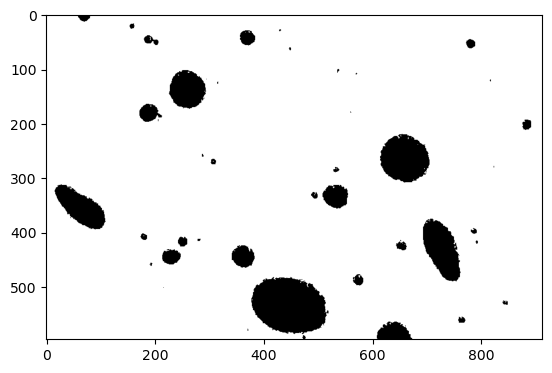

In [7]:
plt.imshow(binary_mask, cmap='gray')

In [8]:
# finding contours in the image
contours, _ = cv2.findContours(inverted_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# copy of the original processed image in BGR to draw the detected contours
contour_image = cv2.cvtColor(inverted_mask, cv2.COLOR_GRAY2BGR)

# draw contours as red lines
cv2.drawContours(contour_image, contours, -1, (0, 0, 255), 2)  

cv2.imshow('Contour image', contour_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
print(len(contours))

46


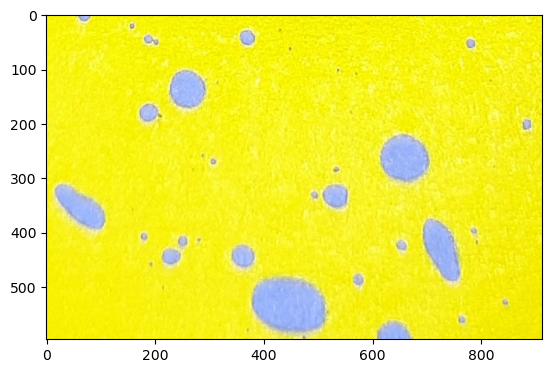

In [10]:
ex_image = plt.imread(r'C:\Users\User\Desktop\Python_projects\Image_processing_project\image_2.jpeg')
plt.imshow(ex_image)

### Eroding image to have "double drips" separated

In [11]:
kernel = np.ones((10, 10), np.uint8)
erosion = cv2.erode(inverted_mask, kernel, iterations=3)
cv2.imshow("Erosion 1", erosion)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [12]:
kernel_2 = np.ones((2, 5), np.uint8)
erosion_2 = cv2.erode(erosion, kernel_2, iterations=1)
cv2.imshow("Erosion 2", erosion_2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
# the double drip in the left is now separated using this process
# there are still some "double drips" in the image 
# which will be processed later
kernel_3 = np.ones((5, 1), np.uint8)
erosion_3 = cv2.erode(erosion_2, kernel_3, iterations=2)
cv2.imshow("Erosion 3", erosion_3)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [14]:
kernel_4 = np.ones((2, 1), np.uint8)
erosion_4 = cv2.erode(erosion_3, kernel_4, iterations=1)
cv2.imshow("Erosion 4", erosion_4)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [15]:
# dilating image
# separated drips are more visible
k_d1 = np.ones((2, 2), np.uint8) 
dilation = cv2.dilate(erosion_4, k_d1, iterations=4)
cv2.imshow("Dilation", dilation)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Separating the big "double drip"

In [16]:
# kernel of the big drip
k_bd = np.ones((1, 5), np.uint8) 
erosion_bd = cv2.erode(dilation, k_bd, iterations=10)
cv2.imshow("First Erosion of the Big Drip", erosion_bd)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [17]:
# another erosion with different kernel
k_bd2 = np.ones((6, 2), np.uint8) 
erosion_bd2 = cv2.erode(erosion_bd, k_bd2, iterations=8)
cv2.imshow("Second Erosion of the Big Drip", erosion_bd2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [18]:
# dilate the separated drips
k_bd3 = np.ones((4, 6), np.uint8) 
dilation_bd = cv2.dilate(erosion_bd2, k_bd3, iterations=1)
cv2.imshow("Dilation of the Big Drip", dilation_bd)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Hough Circle Transformation to find circles
Need to separate some of the small drips.

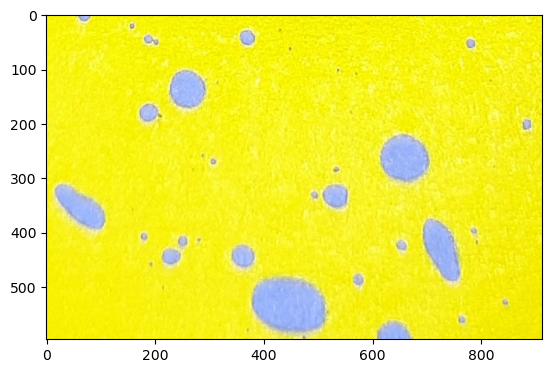

In [19]:
# showing original image as reference
plt.imshow(ex_image)

In [20]:
new_k = np.ones((5, 5), np.uint8)
inverted_mask2 = cv2.dilate(inverted_mask, new_k, iterations=1)

In [21]:
# try diferent parameters to enhace circle detection
contours, _ = cv2.findContours(inverted_mask2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

some_threshold = 100  # Define an appropriate value for your specific case

detected_circles = []
for contour in contours:
    perimeter = cv2.arcLength(contour, True)
    area = cv2.contourArea(contour)

    if perimeter == 0:
        continue
        
    aspect_ratio = (4 * np.pi * area) / (perimeter * perimeter)
    
    if 0.8 < aspect_ratio < 1.2 and area > some_threshold:
        detected_circles.append(contour)

# draw detected circles on the original binary image
result_image = cv2.cvtColor(inverted_mask2, cv2.COLOR_GRAY2BGR)
cv2.drawContours(result_image, detected_circles, -1, (0, 255, 0), 2)

cv2.imshow('Detected Circles', result_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [22]:
cv2.imshow("Binary Image", inverted_mask)
cv2.waitKey(0)
cv2.destroyAllWindows() 